**OBJET**: Model de machine learning pour la reconnaissance des images de panneaux de signaliation.

**NIVEAU**: Master I option IA

Le projet consiste à entrainer un model pour la reconnaissance des panneaux de signalisation dans le but d'aider a la prise de decision pour les voitures autonomes.

***Feuille de route:***

1. Téléchargement et importations des dependances necessaires,
2. Chargement de l'ensemble de données (images de panneaux de signalisation),
3. Fractionnement et conversion des données,
4. Création et compilation du modèle,
5. Formation du modèle,
6. Visualisation des performances du modèle pendant la phase d'entraînement,
7. Chargement de l'ensemble de données de test et évaluation du modèle,
8. Enregistrement du modèle.



In [ ]:
"""

 Importation de Drive pour pouvoir utiliser le dataset telechargeable directement sur Kaggle

"""

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""

  Chargement de la clef privée telecharge sur Kaggle afin de donner acces a notre
  compte Kaggle.

"""
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rushclintakam","key":"086e9f0a8493bd927bf1dc6aad96455b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

In [ ]:
"""

  Téléchargement du Dataset https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

"""

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:21<00:00, 33.5MB/s]
100% 612M/612M [00:21<00:00, 29.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import cv2
from PIL import Image

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
# Configuration de l'environement

os.environ['KAGGLE_USERNAME'] = "rushclintakam" # username from the json file
os.environ['KAGGLE_KEY'] = "086e9f0a8493bd927bf1dc6aad96455b" # key from the json file

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign --unzip --force

100% 610M/612M [00:21<00:00, 33.7MB/s]
100% 612M/612M [00:21<00:00, 29.8MB/s]


In [ ]:
%ls

drive/                         meta/  Meta.csv      test/  Test.csv  Train/
gtsrb-german-traffic-sign.zip  Meta/  sample_data/  Test/  train/    Train.csv


In [ ]:
# Variables
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Récuperation des images et de leurs labels
for i in range(classes):
    path = os.path.join('', "/content/Train", str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Convertion des listes en liste de type numpy
data = np.array(data)
labels = np.array(labels)

/content/Train/0
/content/Train/1
/content/Train/2
/content/Train/3
/content/Train/4
/content/Train/5
/content/Train/6
/content/Train/7
/content/Train/8
/content/Train/9
/content/Train/10
/content/Train/11
/content/Train/12
/content/Train/13
/content/Train/14
/content/Train/15
/content/Train/16
/content/Train/17
/content/Train/18
/content/Train/19
/content/Train/20
/content/Train/21
/content/Train/22
/content/Train/23
/content/Train/24
/content/Train/25
/content/Train/26
/content/Train/27
/content/Train/28
/content/Train/29
/content/Train/30
/content/Train/31
/content/Train/32
/content/Train/33
/content/Train/34
/content/Train/35
/content/Train/36
/content/Train/37
/content/Train/38
/content/Train/39
/content/Train/40
/content/Train/41
/content/Train/42


Fractionnement et conversion des données

In [ ]:
# Affichage des caracteristiques du Dataset et des labels
print(data.shape, labels.shape)

# Découpage du dataset en 2, pour l'entrainement et pour le test. (20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Conversion des labels en un encodege reconnaissable.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Création et compilation du modèle

In [ ]:
# Construction du model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
# Entrainnement du model

with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 156s 157ms/step - loss: 2.2617 - accuracy: 0.4237 - val_loss: 0.8535 - val_accuracy: 0.8030
Epoch 2/15
981/981 [==============================] - 156s 159ms/step - loss: 0.8601 - accuracy: 0.7473 - val_loss: 0.2754 - val_accuracy: 0.9272
Epoch 3/15
981/981 [==============================] - 154s 157ms/step - loss: 0.4462 - accuracy: 0.8699 - val_loss: 0.1518 - val_accuracy: 0.9607
Epoch 4/15
981/981 [==============================] - 157s 160ms/step - loss: 0.3312 - accuracy: 0.9045 - val_loss: 0.0941 - val_accuracy: 0.9719
Epoch 5/15
981/981 [==============================] - 156s 159ms/step - loss: 0.2546 - accuracy: 0.9272 - val_loss: 0.0640 - val_accuracy: 0.9836
Epoch 6/15
981/981 [==============================] - 156s 159ms/step - loss: 0.2313 - accuracy: 0.9341 - val_loss: 0.0662 - val_accuracy: 0.9814
Epoch 7/15
981/981 [==============================] - 156s 159ms/step - loss: 0.2002 - accuracy: 0.9426 - val_loss: 0.0593 -

Visualisation des performances du modèle pendant la phase d'entraînement

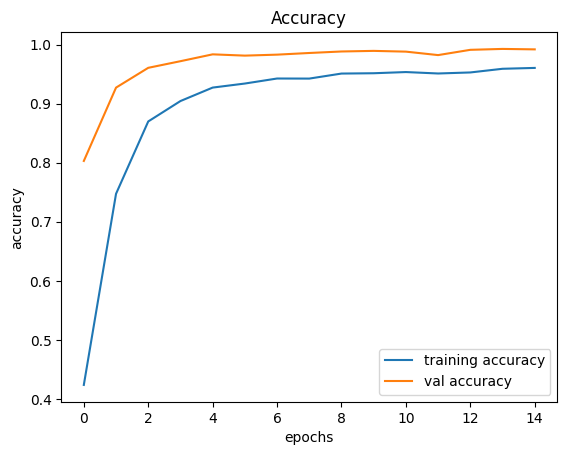

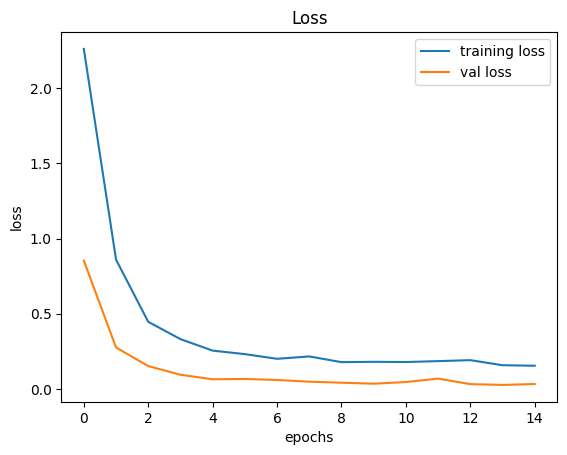

In [ ]:
# Affichage des performances du model

# Performance

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Chargement de l'ensemble de données de test et évaluation du modèle

In [ ]:
from sklearn.metrics import accuracy_score

# Chargement des données de test.
y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 14s 34ms/step
0.9547901821060966


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.97      0.98      0.97       720
           2       0.93      0.99      0.96       750
           3       0.90      0.95      0.93       450
           4       0.97      0.98      0.98       660
           5       0.95      0.93      0.94       630
           6       0.99      0.89      0.94       150
           7       0.99      0.98      0.98       450
           8       0.95      0.95      0.95       450
           9       0.97      0.99      0.98       480
          10       1.00      0.97      0.98       660
          11       0.95      0.96      0.96       420
          12       0.96      0.99      0.97       690
          13       0.98      0.99      0.99       720
          14       1.00      0.99      0.99       270
          15       0.98      0.99      0.99       210
          16       0.99      1.00      1.00       150
          17       0.97    

Prediction sur le dataset de test

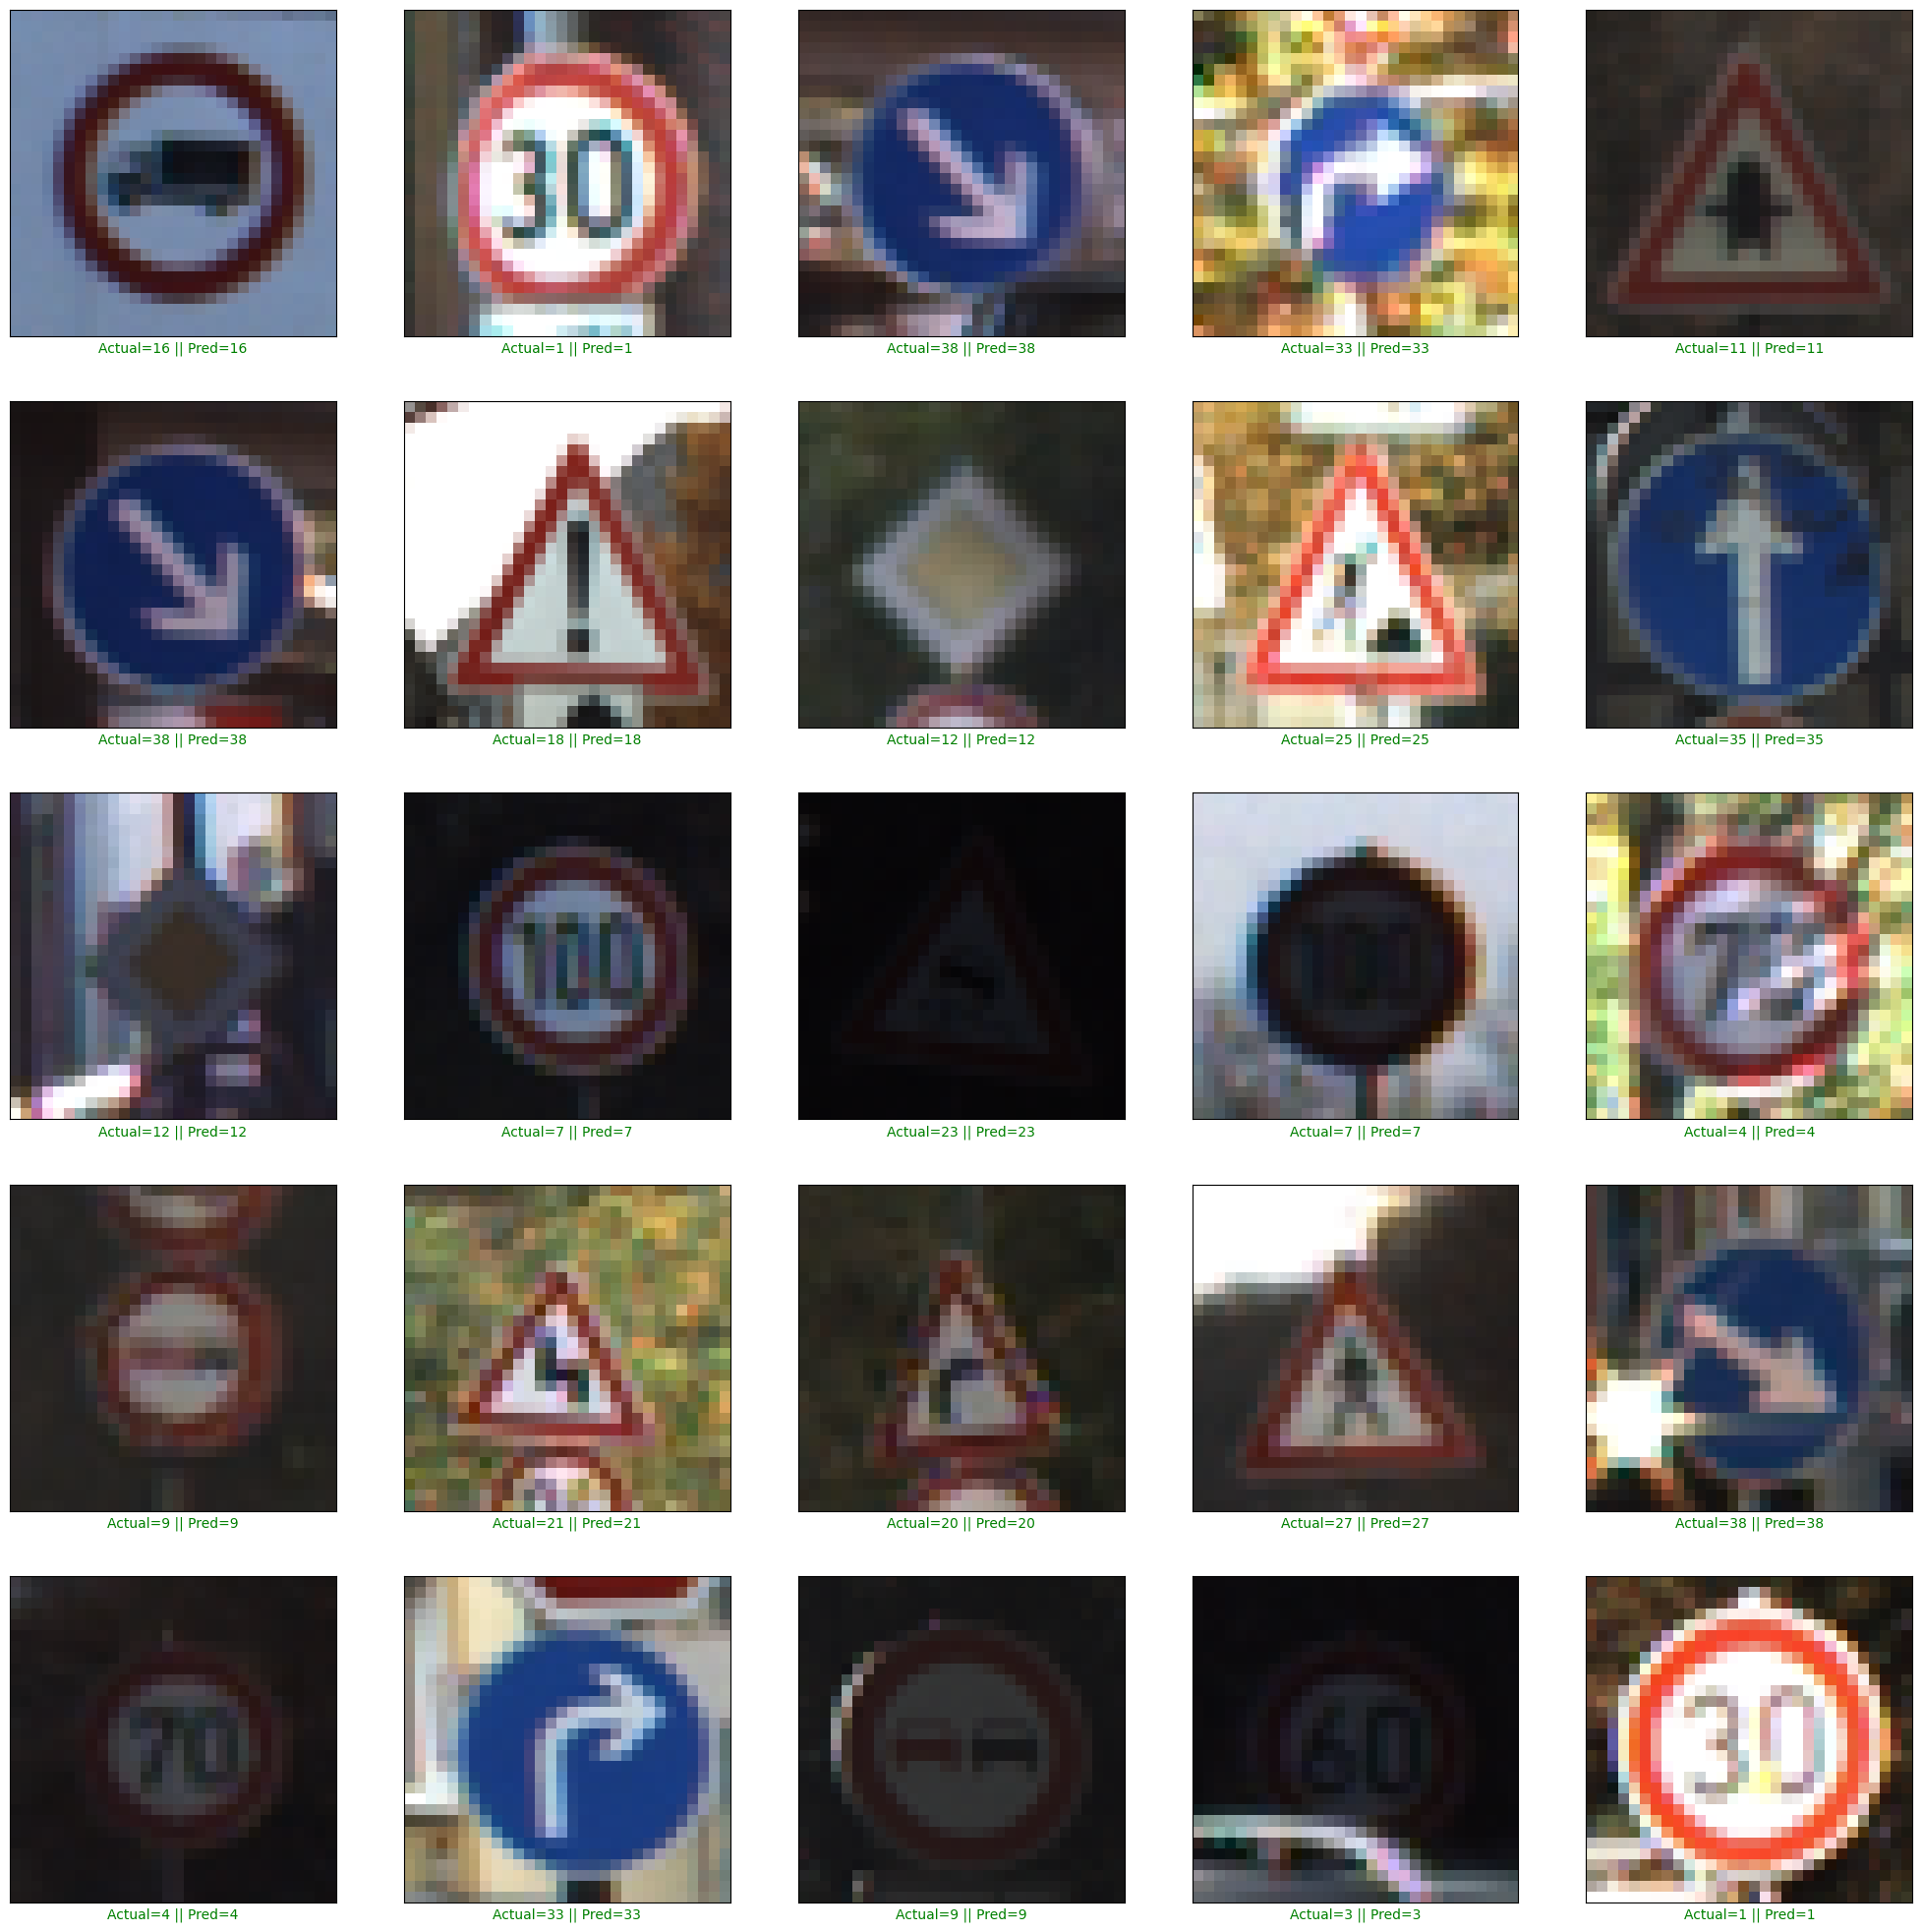

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

Extraction du model

In [ ]:
model.save('traffic_classifier.h5')